In [187]:
from librerias import *

In [188]:
btc = pd.read_csv ('Data/btc_limp.csv')

btc.set_index('Date', inplace=True)

btc.index = pd.to_datetime(btc.index)


btc_mes = btc.resample('MS').first()


btc = btc_mes.loc['2014-01-01':]

In [202]:
btc_mes = btc ['Open']
btc_mes = pd.DataFrame (btc_mes)

In [190]:
btc_mes ['retornos']= btc_mes ['Open'].pct_change ().round (3)

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)



In [191]:
"""mejores_indices = btc_mes['retornos'].nlargest(5).index
mejores_filas = btc_mes.loc[mejores_indices]

peores = btc_mes['retornos'].nsmallest(5).index
peores= btc_mes.loc[peores]
"""

"mejores_indices = btc_mes['retornos'].nlargest(5).index\nmejores_filas = btc_mes.loc[mejores_indices]\n\npeores = btc_mes['retornos'].nsmallest(5).index\npeores= btc_mes.loc[peores]\n"

In [192]:
btc_sin_up = btc_mes.copy ()
btc_sin_up = pd.DataFrame (btc_sin_up)
btc_sin_up.index = pd.to_datetime(btc_sin_up.index)

btc_sin_up_down = btc_mes.copy ()
btc_sin_up_down = pd.DataFrame (btc_sin_up_down)
btc_sin_up_down.index = pd.to_datetime(btc_sin_up_down.index)



In [193]:
btc_mes ['ganancias'] = (1 + btc_mes['retornos']).cumprod()

btc_mes.tail ()

,Open,retornos,ganancias
Date,,,
2023-11-01,34648,0.285,43.024011
2023-12-01,37712,0.088,46.810124
2024-01-01,42272,0.121,52.474149
2024-02-01,42580,0.007,52.841468
2024-03-01,61157,0.436,75.880348


In [194]:
indices_mejores = btc_mes['retornos'].nlargest(5).index
btc_sin_up.loc[indices_mejores, 'retornos'] = 0.0

In [195]:
btc_sin_up ['ganancias'] = (1 + btc_sin_up['retornos']).cumprod()

btc_sin_up.tail ()

,Open,retornos,ganancias
Date,,,
2023-11-01,34648,0.285,4.190586
2023-12-01,37712,0.088,4.559358
2024-01-01,42272,0.121,5.111040
2024-02-01,42580,0.007,5.146817
2024-03-01,61157,0.436,7.390830


In [196]:
# Obtener los índices de los 5 mejores y 5 peores meses
mejores = btc_sin_up_down['retornos'].nlargest(5).index
peores = btc_sin_up_down['retornos'].nsmallest(5).index

# Asignar 0.0 a los valores correspondientes en la columna 'retornos'
btc_sin_up_down.loc[mejores, 'retornos'] = 0.0
btc_sin_up_down.loc[peores, 'retornos'] = 0.0


In [197]:
btc_sin_up_down ['ganancias'] = (1 + btc_sin_up_down['retornos']).cumprod()


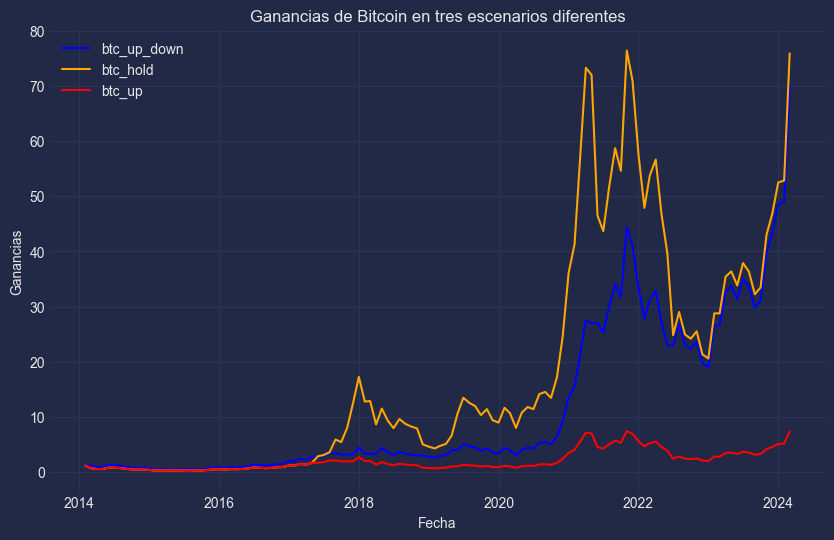

In [198]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar las ganancias de cada DataFrame
plt.plot(btc_sin_up_down.index, btc_sin_up_down['ganancias'], label= 'btc_up_down', color= 'blue')
plt.plot(btc_mes.index, btc_mes['ganancias'], label='btc_hold', color= 'orange')
plt.plot(btc_sin_up.index, btc_sin_up['ganancias'], label='btc_up', color= 'red')

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Ganancias')
plt.title('Ganancias de Bitcoin en tres escenarios diferentes')
plt.legend()  # Mostrar leyenda

# Mostrar el gráfico
plt.grid(True)
plt.show()


In [199]:
btc_hold = btc_mes['ganancias'].iloc[-1].round(2)
btc_updpwn = btc_sin_up_down['ganancias'].iloc[-1].round(2)
btc_sin_1 = btc_sin_up['ganancias'].iloc[-1].round(2)


print (btc_updpwn)

70.2


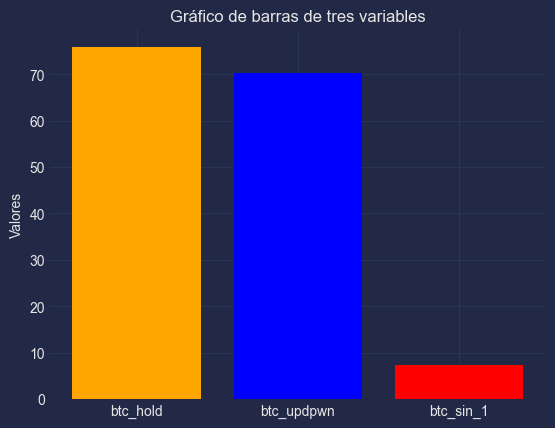

In [200]:

variables = ['btc_hold', 'btc_updpwn', 'btc_sin_1']
valores = [btc_hold, btc_updpwn, btc_sin_1]

# Crear el gráfico de barras
plt.bar(variables, valores, color=['Orange', 'blue', 'red'])

# Configurar etiquetas y título
#plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Gráfico de barras de tres variables')

# Mostrar el gráfico
plt.show()



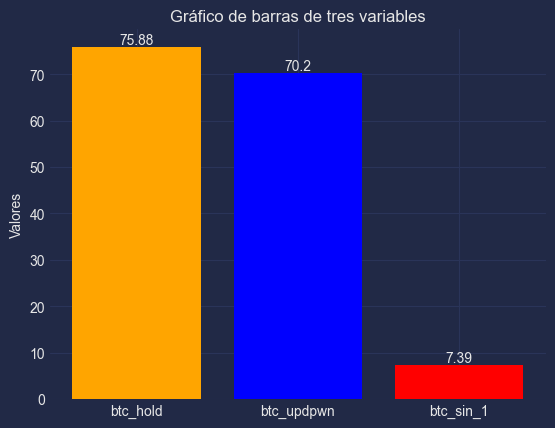

In [201]:
import matplotlib.pyplot as plt

# Datos
variables = ['btc_hold', 'btc_updpwn', 'btc_sin_1']
valores = [btc_hold, btc_updpwn, btc_sin_1]

# Crear el gráfico de barras
plt.bar(variables, valores, color=['orange', 'blue', 'red'])

# Agregar los valores numéricos encima de las columnas
for i, valor in enumerate(valores):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Configurar etiquetas y título
plt.ylabel('Valores')
plt.title('Gráfico de barras de tres variables')

# Mostrar el gráfico
plt.show()
